# 0. Import Data

In [366]:
%pip install pandas
%pip install matplotlib
%pip install numpy

In [367]:
import random
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from matplotlib.colors import LogNorm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [368]:
# Can have as many cells as you want for code
filepath = "./data/catA_train.csv"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file
if not os.path.exists('/content/data'):
    os.makedirs('/content/data')

## **Please add catA_train.csv into data before continuing with code.**

In [369]:
df = pd.read_csv(filepath, sep = ",")

# 1. Data Inspection

In [370]:
### Make Copy
df2 = df.copy()

In [371]:
print("Information of catA_train.csv:")
print(df2.shape)
print(df2.columns)
print(df2.info())
print(df2.describe())
print(df2.head())

Information of catA_train.csv:
(29182, 28)
Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --

**Description of each column**
* Location: Latitude and Longitude combine to find location.
*   AccountID: A distinctive label or number assigned to a specific account within a system or organization.
*   Company: Description of the client's race.
* SIC Code: Standard Industrial Classification (SIC) code is a numerical system used to classify and categorize industries based on their primary economic activities.
* Industry: Specific sector of economic activity.
* 8-Digit SIC Code: A numerical code system used to classify and categorize industries based on their primary business activities.
* 8-Digit SIC Description: Description of the 8-digit SIC code.
* Year Found: Year in which an entity, such as a company or organization, was founded or established.
* Entity Type: The legal structure or form that an organization or business entity takes.
* Parent Company: A corporation or another form of business entity that owns or controls another company.
* Parent Country: The country of origin or the home country of a multinational corporation or a company that has subsidiaries or operations in multiple countries.
* Ownership Type: The classification or categorization of the legal structure that dictates how a business entity is owned, managed, and organized.
* Company Description: A concise and informative overview that provides key details about a business entity.
* Square Footage: A unit of measure used to quantify the total area or size of a two-dimensional space.
* Company Status (Active/Inactive): The current standing or operational condition of a business entity, indicating whether it is currently active and conducting business or inactive.
* Employees (Single Site): The total number of individuals employed by a company at a specific location or site.
* Employees (Domestic Ultimate Total): The total number of individuals employed by a company across all its domestic or home-country operations.
* Employees (Global Ultimate Total): The total number of individuals employed by a company across all its global operations.
* Sales (Domestic Ultimate Total USD): The total sales revenue generated by a company within its domestic or home country operations, measured in U.S. dollars.
* Sales (Global Ultimate Total USD): The total sales revenue generated by a company on a global scale, measured in U.S. dollars.
* Import/Export Status: The classification of a company based on its involvement in international trade, specifically with regard to importing and exporting goods.
* Fiscal Year End: The conclusion of a company's accounting and financial reporting period. (Convert from company year found to 2023.)
* Global Ultimate Company: The top-level entity or parent company within a corporate structure that has a presence and operations on a global scale.
* Global Ultimate: A country that holds a central or pivotal role within a multinational corporate structure as the ultimate or top-level entity at a global scale.
* Domestic Ultimate Company: The highest-level entity within a corporate structure that is based in the country where the business primarily operates.
* Is Domestic Ultimate: A categorical attribute or indicator that signifies whether a particular entity or company is the ultimate or highest-level company within a corporate structure based in its home country.
* Is Global Ultimate: A categorical attribute or indicator that signifies whether a particular entity or company holds the status of being the ultimate or highest-level company within a corporate structure on a global scale.




# 2. Data Cleaning


In [372]:
df3 = df2.copy()

In [373]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [374]:
# Check for missing values in each feature column and find the percentage difference
missing_data = df3.isnull().sum()

missing_ratio = (missing_data / len(df3)) * 100

missing_info = pd.DataFrame({
    'Feature': missing_data.index,
    'Missing Values': missing_data.values,
    'Missing Ratio (%)': missing_ratio.values
})

print(missing_info)

                                Feature  Missing Values  Missing Ratio (%)
0                              LATITUDE             120           0.411212
1                             LONGITUDE             120           0.411212
2                             AccountID               0           0.000000
3                               Company               0           0.000000
4                              SIC Code               0           0.000000
5                              Industry               0           0.000000
6                      8-Digit SIC Code               0           0.000000
7               8-Digit SIC Description               0           0.000000
8                            Year Found             434           1.487218
9                           Entity Type               0           0.000000
10                       Parent Company             514           1.761360
11                       Parent Country             520           1.781920
12                       

In [375]:
# Fill in Employees number
def fill_missing_employees(df):
    # Fill missing values in 'Employees (Domestic Ultimate Total)' where 'Domestic Ultimate Company' is empty
    df.loc[df['Domestic Ultimate Company'].isnull(), 'Employees (Domestic Ultimate Total)'] = 0

    # Fill missing values in 'Employees (Global Ultimate Total)' where 'Global Ultimate Company' is empty
    df.loc[df['Global Ultimate Company'].isnull(), 'Employees (Global Ultimate Total)'] = 0

    # Fill missing values in 'Employees (Single Site)'
    df['Employees (Single Site)'].fillna(0, inplace=True)
    df['Employees (Single Site)'] = np.where(df['Employees (Single Site)'] == 0, df['Employees (Domestic Ultimate Total)'], df['Employees (Single Site)'])
    df['Employees (Single Site)'] = np.where(df['Employees (Single Site)'] == 0, df['Employees (Global Ultimate Total)'], df['Employees (Single Site)'])

    # Fill missing values in 'Employees (Domestic Ultimate Total)'
    df['Employees (Domestic Ultimate Total)'].fillna(0, inplace=True)
    df['Employees (Domestic Ultimate Total)'] = np.where(df['Employees (Domestic Ultimate Total)'] == 0, df['Employees (Global Ultimate Total)'], df['Employees (Domestic Ultimate Total)'])
    df['Employees (Domestic Ultimate Total)'] = np.where(df['Employees (Domestic Ultimate Total)'] == 0, df['Employees (Single Site)'], df['Employees (Domestic Ultimate Total)'])

    # Fill missing values in 'Employees (Global Ultimate Total)'
    df['Employees (Global Ultimate Total)'].fillna(0, inplace=True)
    df['Employees (Global Ultimate Total)'] = np.where(df['Employees (Global Ultimate Total)'] == 0, df['Employees (Single Site)'], df['Employees (Global Ultimate Total)'])
    df['Employees (Global Ultimate Total)'] = np.where(df['Employees (Global Ultimate Total)'] == 0, df['Employees (Domestic Ultimate Total)'], df['Employees (Global Ultimate Total)'])

    return(df)

df3 = fill_missing_employees(df3)

In [376]:
# Drop Square Footage and Fiscal Year End due to high missing ratio
df3.drop(columns=["Square Footage"], inplace=True)
df3.drop(columns=["Fiscal Year End"], inplace=True)
df3.drop(columns=['Import/Export Status'], inplace = True)

# Drop rows with missing values under 10%
df3.dropna(inplace=True)

In [377]:
# Check for missing values in each feature column and find the percentage difference
missing_data = df3.isnull().sum()

missing_ratio = (missing_data / len(df3)) * 100

missing_info = pd.DataFrame({
    'Feature': missing_data.index,
    'Missing Values': missing_data.values,
    'Missing Ratio (%)': missing_ratio.values
})

print(missing_info)

                                Feature  Missing Values  Missing Ratio (%)
0                              LATITUDE               0                0.0
1                             LONGITUDE               0                0.0
2                             AccountID               0                0.0
3                               Company               0                0.0
4                              SIC Code               0                0.0
5                              Industry               0                0.0
6                      8-Digit SIC Code               0                0.0
7               8-Digit SIC Description               0                0.0
8                            Year Found               0                0.0
9                           Entity Type               0                0.0
10                       Parent Company               0                0.0
11                       Parent Country               0                0.0
12                       

# 3. Features Selection

In [378]:
df4 = df3.copy()

In [379]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27504 entries, 0 to 29181
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             27504 non-null  float64
 1   LONGITUDE                            27504 non-null  float64
 2   AccountID                            27504 non-null  object 
 3   Company                              27504 non-null  object 
 4   SIC Code                             27504 non-null  float64
 5   Industry                             27504 non-null  object 
 6   8-Digit SIC Code                     27504 non-null  float64
 7   8-Digit SIC Description              27504 non-null  object 
 8   Year Found                           27504 non-null  float64
 9   Entity Type                          27504 non-null  object 
 10  Parent Company                       27504 non-null  object 
 11  Parent Country              

In [380]:
df4.nunique()

LATITUDE                                8973
LONGITUDE                               8976
AccountID                              27504
Company                                27504
SIC Code                                 582
Industry                                 580
8-Digit SIC Code                        2196
8-Digit SIC Description                 2133
Year Found                               106
Entity Type                                4
Parent Company                         17352
Parent Country                            69
Ownership Type                             6
Company Description                    26989
Company Status (Active/Inactive)           1
Employees (Single Site)                  380
Employees (Domestic Ultimate Total)      383
Employees (Global Ultimate Total)       1989
Sales (Domestic Ultimate Total USD)     8066
Sales (Global Ultimate Total USD)       7324
Global Ultimate Company                13793
Global Ultimate Country                   74
Domestic U

In [381]:
# Drop columns where there is no cluster
df4.drop(columns=["AccountID"], inplace=True)
df4.drop(columns=["Company"], inplace=True)
df4.drop(columns=["Industry"], inplace=True)
df4.drop(columns=["8-Digit SIC Description"], inplace=True)
df4.drop(columns=["Parent Company"], inplace=True)
df4.drop(columns=["Company Description"], inplace=True)
df4.drop(columns=["Sales (Global Ultimate Total USD)"], inplace=True)
df4.drop(columns=["Company Status (Active/Inactive)"], inplace=True)
df4.drop(columns=["Global Ultimate Company"], inplace=True)
df4.drop(columns=["Domestic Ultimate Company"], inplace=True)

In [382]:
# Log and round up sales data to simplify it
for idx, value in df4['Sales (Domestic Ultimate Total USD)'].items():
    if value < 0:
        x = -value
        df4.at[idx, 'Sales (Domestic Ultimate Total USD)'] = -np.log(x)
    elif value == 0:
        df4.at[idx, 'Sales (Domestic Ultimate Total USD)'] = 0
    else:
        df4.at[idx, 'Sales (Domestic Ultimate Total USD)'] = np.log(value)

In [383]:
# Find Top 10 values of each column and their percentage
df4_unique = df4.copy()
for col in df4_unique.columns:
  print(f"\nColumn: {col}")
  value_counts = df4_unique[col].value_counts(dropna=False, normalize=True)
  top_3_values = value_counts.head(10)
  for value, percentage in top_3_values.items():
      print(f"Value: {value}, Percentage: {percentage * 100:.2f}%")


Column: LATITUDE
Value: 1.27573568143134, Percentage: 2.53%
Value: 1.27763073260823, Percentage: 2.14%
Value: 1.27812790985944, Percentage: 1.15%
Value: 1.31881486980278, Percentage: 1.11%
Value: 1.28013746997584, Percentage: 0.92%
Value: 1.2863943805652, Percentage: 0.85%
Value: 1.2828873744144, Percentage: 0.63%
Value: 1.29543569778908, Percentage: 0.62%
Value: 1.35857900095019, Percentage: 0.61%
Value: 1.29222075807721, Percentage: 0.59%

Column: LONGITUDE
Value: 103.845703218601, Percentage: 2.53%
Value: 103.847572724879, Percentage: 2.14%
Value: 103.847854628243, Percentage: 1.15%
Value: 103.892580778242, Percentage: 1.11%
Value: 103.849316412731, Percentage: 0.92%
Value: 103.848988700522, Percentage: 0.85%
Value: 103.850848813815, Percentage: 0.63%
Value: 103.858374825349, Percentage: 0.62%
Value: 103.833601031742, Percentage: 0.61%
Value: 103.850612609298, Percentage: 0.59%

Column: SIC Code
Value: 6719.0, Percentage: 26.50%
Value: 8742.0, Percentage: 4.80%
Value: 7371.0, Perce

In [384]:
# Remove outliers that are less than 0.01%
threshold = len(df4) * 0.0001

for col_index, col_name in enumerate(df4.columns):
  col_count = df4[col_name].value_counts()
  outliers = col_count[col_count < threshold].index
  df4 = df4[~df4[col_name].isin(outliers)]

In [385]:
# Label encoding
label_encoder_country = LabelEncoder()

# Parent Country and Global Countries
unique_parent_countries = df2['Parent Country'].unique()
unique_global_ultimate_countries = df2['Global Ultimate Country'].unique()
all_unique_countries = np.concatenate([unique_parent_countries, unique_global_ultimate_countries])

label_encoder_country.fit(all_unique_countries)

df4['Parent Country'] = label_encoder_country.transform(df4['Parent Country'])
df4['Global Ultimate Country'] = label_encoder_country.transform(df4['Global Ultimate Country'])

# Entity Type
label_encoder_entity = LabelEncoder()
label_encoder_entity.fit(df2['Entity Type'])
df4['Entity Type'] = label_encoder_entity.transform(df4['Entity Type'])

# Ownership Type
label_encoder_ownership = LabelEncoder()
label_encoder_ownership.fit(df2['Ownership Type'])
df4['Ownership Type'] = label_encoder_ownership.transform(df4['Ownership Type'])

In [386]:
for col in df4.columns.tolist():
  df4[col] = df4[col].astype('float')

In [387]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 2 to 29180
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             11567 non-null  float64
 1   LONGITUDE                            11567 non-null  float64
 2   SIC Code                             11567 non-null  float64
 3   8-Digit SIC Code                     11567 non-null  float64
 4   Year Found                           11567 non-null  float64
 5   Entity Type                          11567 non-null  float64
 6   Parent Country                       11567 non-null  float64
 7   Ownership Type                       11567 non-null  float64
 8   Employees (Single Site)              11567 non-null  float64
 9   Employees (Domestic Ultimate Total)  11567 non-null  float64
 10  Employees (Global Ultimate Total)    11567 non-null  float64
 11  Sales (Domestic Ultimate Tot

# 4. Model Selection

## 4.1 Train-Test Data

In [388]:
df_final = df4.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 2 to 29180
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             11567 non-null  float64
 1   LONGITUDE                            11567 non-null  float64
 2   SIC Code                             11567 non-null  float64
 3   8-Digit SIC Code                     11567 non-null  float64
 4   Year Found                           11567 non-null  float64
 5   Entity Type                          11567 non-null  float64
 6   Parent Country                       11567 non-null  float64
 7   Ownership Type                       11567 non-null  float64
 8   Employees (Single Site)              11567 non-null  float64
 9   Employees (Domestic Ultimate Total)  11567 non-null  float64
 10  Employees (Global Ultimate Total)    11567 non-null  float64
 11  Sales (Domestic Ultimate Tot

In [389]:
features = df_final.columns.tolist()
columns_to_remove = ['Sales (Domestic Ultimate Total USD)']

for column in columns_to_remove:
    features.remove(column)

print(features)

['LATITUDE', 'LONGITUDE', 'SIC Code', '8-Digit SIC Code', 'Year Found', 'Entity Type', 'Parent Country', 'Ownership Type', 'Employees (Single Site)', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)', 'Global Ultimate Country', 'Is Domestic Ultimate', 'Is Global Ultimate']


In [390]:
# Define features (X) and target variable (y)
X = df_final[features]
y = df_final['Sales (Domestic Ultimate Total USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

## 4.2 Model Evaluation

Mean Squared Error (MSE) is chosen for its ability to quantify the average squared difference between predicted and actual values. Low MSE indicates better model performance, minimizing errors, while high MSE reflects greater deviations from actual values, signifying poorer model accuracy.

In [391]:
# Initialize Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.925353466226984


In [392]:
# Create a KNN Regressor instance
knn_regressor = KNeighborsRegressor(n_neighbors=10)
# Train the KNN model
knn_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.846077338383328


In [393]:
# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=88)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.045454993463701


In [394]:
# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=88)

# Train the Random Forest model
rf_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.103777736532178


In [395]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=88)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/100
232/232 [==============================] - 3s 6ms/step - loss: 61.6824 - val_loss: 15.0756
Epoch 2/100
232/232 [==============================] - 1s 3ms/step - loss: 8.8621 - val_loss: 9.5219
Epoch 3/100
232/232 [==============================] - 1s 5ms/step - loss: 6.7947 - val_loss: 7.4555
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 5.9340 - val_loss: 6.4096
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 5.4820 - val_loss: 5.8647
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 5.1069 - val_loss: 5.2900
Epoch 7/100
232/232 [==============================] - 2s 8ms/step - loss: 4.7988 - val_loss: 4.8458
Epoch 8/100
232/232 [==============================] - 1s 6ms/step - loss: 4.4288 - val_loss: 4.3201
Epoch 9/100
232/232 [==============================] - 1s 5ms/step - loss: 4.0879 - val_loss: 3.9636
Epoch 10/100
232/232 [==============================] - 1s 5ms/step - loss: 3.8047 - val_

# 5. Model Development

## 5.1 Model Training
Since Random Forest have the best result, we will be developing a model base on Random Forest.

In [396]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 2 to 29180
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             11567 non-null  float64
 1   LONGITUDE                            11567 non-null  float64
 2   SIC Code                             11567 non-null  float64
 3   8-Digit SIC Code                     11567 non-null  float64
 4   Year Found                           11567 non-null  float64
 5   Entity Type                          11567 non-null  float64
 6   Parent Country                       11567 non-null  float64
 7   Ownership Type                       11567 non-null  float64
 8   Employees (Single Site)              11567 non-null  float64
 9   Employees (Domestic Ultimate Total)  11567 non-null  float64
 10  Employees (Global Ultimate Total)    11567 non-null  float64
 11  Sales (Domestic Ultimate Tot

In [397]:
# Separate features and target variable
X = df_final.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df_final['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Do grid-search to get best parameters
param_grid = {
    'n_estimators': [None, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4]
}

# Create the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=88)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [398]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 20, random_state=88)

Cross-Validation: We will also perform a K-fold Cross Validation. This helps us mitigate the risk of overfitting on a specific set of data, by being able to split the data into K number of folds, test on 1 fold and train for the rest for K number of times.

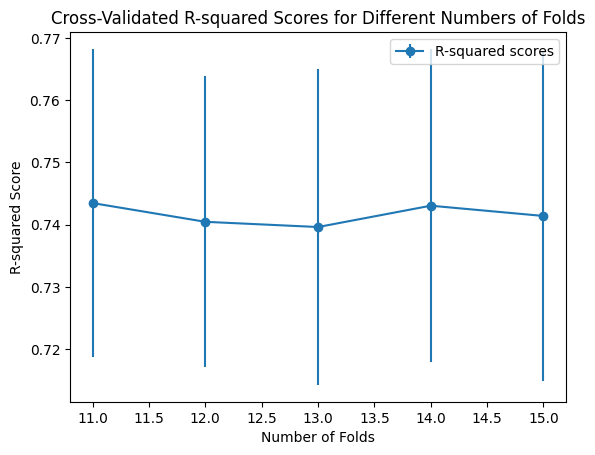

In [38]:
# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

## 5.2 Model Evalutation Metrics

There are many ways to evaluate a Machine Learning model:

- Residual Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Average Percentage Error (MAPE) for Regression Tasks;
- Confusion Matrix, AUC-ROC Curve for Classification Problems;
- and other variants of such metrics.

In this problem, MSE will be very big as the sales are very large by nature. We will opt to use the R-Squared Score (used to score how well a regression model fits its data).

In [399]:
# Use k-fold cross-validation with 10 folds
model_10 = RandomForestRegressor(n_estimators = 100, max_depth = 20, random_state=88)
kf = KFold(n_splits=12, shuffle=True, random_state=88)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [0.83938746 0.84300803 0.81385892 0.8190621  0.8179446  0.828279
 0.80391806 0.81068899 0.82577384 0.83754793 0.87439951 0.77893405]
Mean R-squared score: 0.8244002075383601
Standard Deviation of R-squared scores: 0.02257685056233758
Test R-squared score: 0.837765086655943


# 6. Final

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [400]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(model_10, 'base_model.h5')

['base_model.h5']

In [401]:
def preprocessing(data):
  # Get the data
  test = data.copy()
  test = fill_missing_employees(test)

  features = df_final.columns.tolist()
  features.remove('Sales (Domestic Ultimate Total USD)')
  test = test[features]

  # Fill up null values for float
  float_columns = test.select_dtypes(include=['float']).columns
  for col in float_columns:
    percentile_25 = test[col].quantile(0.25)
    percentile_75 = test[col].quantile(0.75)
    random_numbers = np.random.uniform(percentile_25, percentile_75, test[col].isnull().sum())
    test.loc[test[col].isnull(), col] = random_numbers

  # Fill up null values for object
  object_columns = test.select_dtypes(include=['object']).columns
  for col in object_columns:
    value_count = test[col].value_counts(dropna=False, normalize=True)
    top = value_count.idxmax()
    test[col].fillna(top, inplace=True)

  # Label Encoder
  test['Parent Country'] = label_encoder_country.transform(test['Parent Country'])
  test['Global Ultimate Country'] = label_encoder_country.transform(test['Global Ultimate Country'])

  test['Entity Type'] = label_encoder_entity.transform(test['Entity Type'])
  test['Ownership Type'] = label_encoder_ownership.transform(test['Ownership Type'])

  # Convert to same type
  for col in test.columns.tolist():
     test[col] = test[col].astype('float')

  return(test)

x = preprocessing(df)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29182 non-null  float64
 1   LONGITUDE                            29182 non-null  float64
 2   SIC Code                             29182 non-null  float64
 3   8-Digit SIC Code                     29182 non-null  float64
 4   Year Found                           29182 non-null  float64
 5   Entity Type                          29182 non-null  float64
 6   Parent Country                       29182 non-null  float64
 7   Ownership Type                       29182 non-null  float64
 8   Employees (Single Site)              29182 non-null  float64
 9   Employees (Domestic Ultimate Total)  29182 non-null  float64
 10  Employees (Global Ultimate Total)    29182 non-null  float64
 11  Global Ultimate Country     

In [402]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    loaded_model = joblib.load('./base_model.h5')

    test = preprocessing(hidden_data)
    predictions = loaded_model.predict(test)
    return np.exp(predictions)

##### Cell to check testing_hidden_data function

In [403]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])

print(testing_hidden_data(test_df))

[5.32500093e+06 3.78414897e+08 1.42765516e+06 ... 5.98169353e+06
 1.02537070e+06 1.02070469e+06]


##### Own Testing

In [404]:
x = testing_hidden_data(test_df)
y = df['Sales (Domestic Ultimate Total USD)']

print(list(zip(x,y)))

percentage_differences = []
for x_val, y_val in zip(x, y):
    percentage_diff = np.abs((x_val - y_val) / y_val) * 100
    percentage_differences.append(percentage_diff)

print(percentage_differences)

# Calculate the mean of the percentage differences
mean_percentage_difference = np.mean(percentage_differences)

print("Mean percentage difference: {:.2f}%".format(mean_percentage_difference))

[(5325000.927919279, 2209224.0), (378414897.0470255, 7093536000.0), (1427655.1585609163, 1026308.0), (36923148462.029274, 73398976000.0), (1024514.1775672794, 432213.0), (1015367.7459333617, 1026308.0), (333595481.2904717, 5025089798.0), (1024102.706047199, 1026308.0), (1100536.3076155432, 649342.0), (190459930.93598682, 342441000.0), (877802842.9912485, 8014011.0), (7621041.079419057, 9367155.0), (1024543.952111507, 1026308.0), (616434.349623747, 635649.0), (4383084.736283752, 2141640.0), (7334565.412463125, 6062458.0), (27099812.611955196, 18643800.0), (1209375.416401341, 68128927.0), (442484.9882185427, 441376.0), (443114272.70114124, 630866949.0), (2581350.630794488, 12545584.0), (17607489.737932723, 18443540.0), (11194381.901849102, 2444934.0), (174707576.77166933, 33980528.0), (1026248.1498036316, 1026308.0), (993080.7059629356, 1026308.0), (521364.0000000065, 521364.0), (116965479.45598455, 128823163.0), (381097.45319502056, 384985.0), (1414648.7067726194, 331032.0), (2022575.72

In [405]:
# Calculate the minimum, maximum, 25th percentile, median, and 75th percentile
min_percentage_diff = np.min(percentage_differences)
max_percentage_diff = np.max(percentage_differences)
percentile_25 = np.percentile(percentage_differences, 25)
median_percentage_diff = np.median(percentage_differences)
percentile_75 = np.percentile(percentage_differences, 75)

# Print the results
print("Minimum:", min_percentage_diff)
print("Maximum:", max_percentage_diff)
print("25th Percentile:", percentile_25)
print("Median:", median_percentage_diff)
print("75th Percentile:", percentile_75)

Minimum: 9.326002369400864e-14
Maximum: 53831261.27347663
25th Percentile: 1.5427406029483435
Median: 30.095185803024123
75th Percentile: 88.64817668446975


# 7. References

* https://chat.openai.com/share/94e252a5-e99a-4b0c-8bdb-8c878c536268
* https://chat.openai.com/share/8d8c096f-dbde-4fa1-be9b-39f3b62ec9ea
* https://chat.openai.com/share/dbc554b7-2035-4675-aca4-ec41797ec4e0